#Installing and Importing Libraries:

In [2]:
#Installing Libraries:
!pip install scikit-learn
!pip install wordcloud

In [3]:
!pip install nltk

In [4]:
#Importng Libraries:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import string
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, widgets

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [5]:
#Loading Dataset:
fake_data = pd.read_csv("/content/fake.csv")
true_data = pd.read_csv("/content/true.csv")

In [6]:
true_data['label'] = 1
fake_data['label'] = 0

In [7]:
#Combine the Dataset:
data = pd.concat([fake_data, true_data])

##NLP Preprocessing:

In [15]:
def preprocess_text(text):
  text = text.lower()
  text = ''.join([char for char in text if char not in string.punctuation])
  tokens = nltk.word_tokenize(text)
  stopwords = set(nltk.corpus.stopwords.words('english'))
  tokens = [word for word in tokens if word not in stopwords]
  lemmatizer = nltk.WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(word) for word in tokens]
  return ' '.join(tokens)

In [16]:
data['text'] = data['text'].apply(preprocess_text)

##Exploratory Data Analysis:

In [18]:
#Distribution of text lengths:
data['text_length'] = data['text'].apply(len)

In [19]:
#Top Words in Dataset:
topwords = pd.Series(' '.join(data['text']).split()).value_counts()[:10]

In [20]:
#Top Bigrams:
top_bigrams = nltk.FreqDist(nltk.ngrams(' '.join(data['text']).split(),2)).most_common(10)

In [27]:
top_bigrams

[(('donald', 'trump'), 23232),
 (('united', 'state'), 18378),
 (('white', 'house'), 14681),
 (('trump', '’'), 11786),
 (('hillary', 'clinton'), 9181),
 (('”', 'said'), 8671),
 (('new', 'york'), 8637),
 (('president', 'donald'), 6934),
 (('washington', 'reuters'), 6493),
 (('north', 'korea'), 6477)]

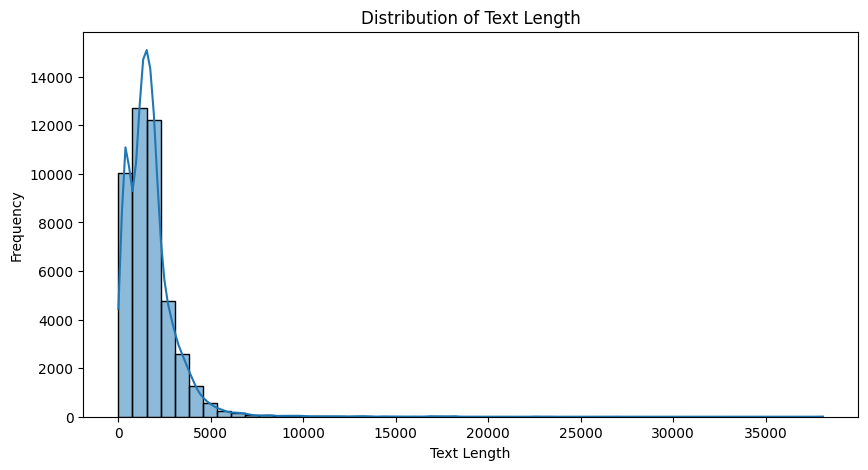

In [21]:
#Plot:
plt.figure(figsize=(10,5))
sns.histplot(data['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

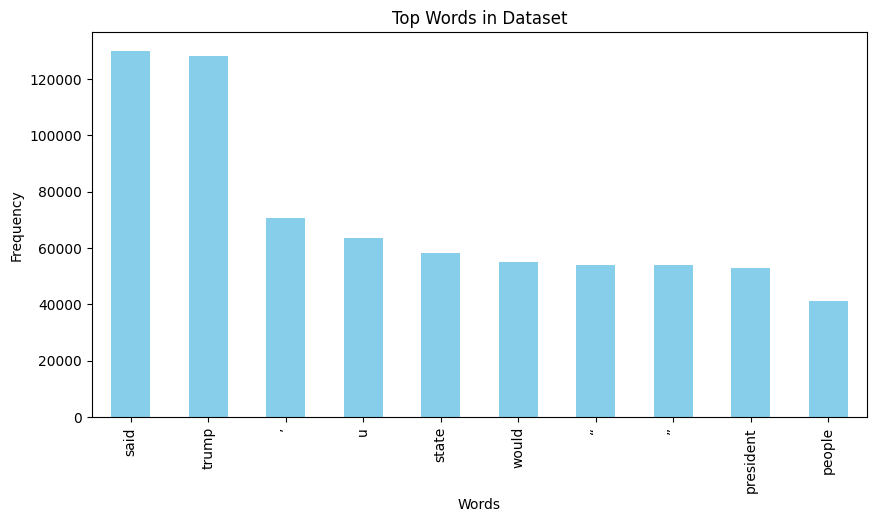

In [22]:
plt.figure(figsize= (10,5))
topwords.plot(kind='bar', color='skyblue')
plt.title('Top Words in Dataset')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

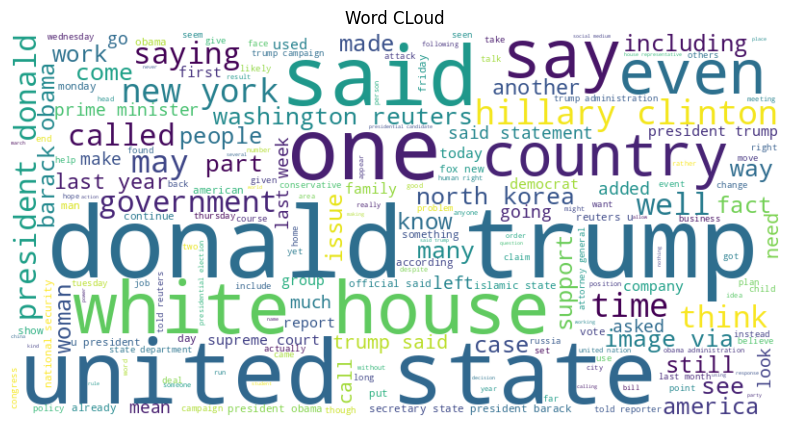

In [28]:
#Word Cloud:
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(data['text']))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word CLoud')
plt.show()

##Splitting Dataset:


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(data['text'], data['label'], test_size = 0.3, random_state=42)

##Train Model:

In [29]:
#Train the models
rf_pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('rf', RandomForestClassifier())])
lr_pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('lr', LogisticRegression())])
svm_pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('svm', SVC())])

# Lists to store training and testing accuracy
train_accuracy = []
test_accuracy = []

In [31]:
#Train the models and collect accuracy
for model, name in zip([rf_pipeline, lr_pipeline, svm_pipeline], ['Random Forest', 'Logistic Regression', 'SVM']):
    model.fit(X_train, Y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_acc = accuracy_score(Y_train, train_pred)
    test_acc = accuracy_score(Y_test, test_pred)

    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)

    print(f"{name} Training Accuracy: {train_acc}")
    print(f"{name} Testing Accuracy: {test_acc}")

Random Forest Training Accuracy: 0.9999681812396589
Random Forest Testing Accuracy: 0.9880475129918337
Logistic Regression Training Accuracy: 0.9912180221458572
Logistic Regression Testing Accuracy: 0.9853006681514477
SVM Training Accuracy: 0.9995863561155658
SVM Testing Accuracy: 0.9922048997772829


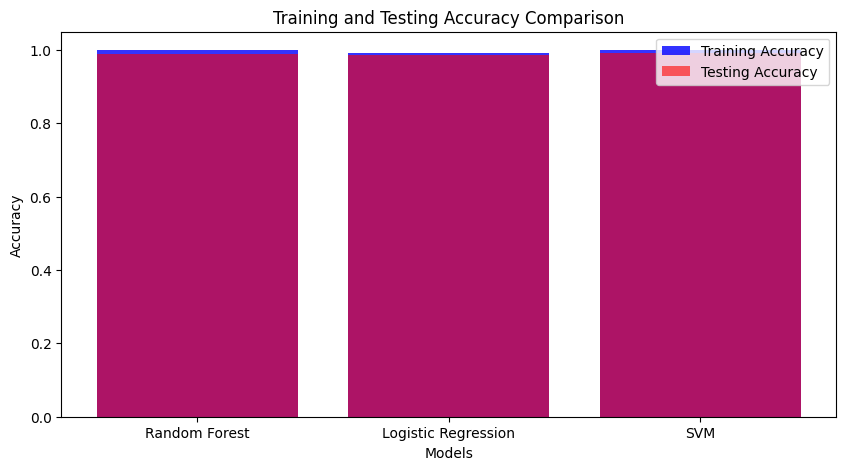

In [32]:
#Plot training and testing accuracy
plt.figure(figsize=(10, 5))
models = ['Random Forest', 'Logistic Regression']
plt.bar(models, train_accuracy, alpha=0.8, label='Training Accuracy', color='b')
plt.bar(models, test_accuracy, alpha=0.6, label='Testing Accuracy', color='r')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy Comparison')
plt.legend()
plt.show()

##Output:

In [34]:
#Confusion Matrix and Classification Report for one of the models (Random Forest in this case)
rf_pred = rf_pipeline.predict(X_test)
rf_conf_matrix = confusion_matrix(Y_test, rf_pred)
rf_class_report = classification_report(Y_test, rf_pred)

print("Confusion Matrix for Random Forest:")
print(rf_conf_matrix)
print("\nClassification Report for Random Forest:")
print(rf_class_report)

Confusion Matrix for Random Forest:
[[7006   85]
 [  76 6303]]

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7091
           1       0.99      0.99      0.99      6379

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



##Simulation:

In [35]:
def fake_news_detection_app(news_text):
    # Model prediction
    rf_result = rf_pipeline.predict([news_text])[0]
    lr_result = lr_pipeline.predict([news_text])[0]
    svm_result = svm_pipeline.predict([news_text])[0]

    # Display the results in a more interactive way
    print("Prediction Results:")
    print("Random Forest:", "Fake" if rf_result == 1 else "True")
    print("Logistic Regression:", "Fake" if lr_result == 1 else "True")
    print("SVM:", "Fake" if svm_result == 1 else "True")

In [39]:
# Interactive text input
@interact(news_text=widgets.Textarea(description="Enter the news text:", rows=5, value=""))
def get_user_input(news_text):
    if news_text:
        fake_news_detection_app(news_text)

interactive(children=(Textarea(value='', description='Enter the news text:', rows=5), Output()), _dom_classes=…